In [126]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


<string>:68: RuntimeWarning: divide by zero encountered in double_scalars


DatetimeIndex(['2016-03-08 21:00:00+00:00', '2016-03-09 21:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)
DatetimeIndex(['2017-09-01 20:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)


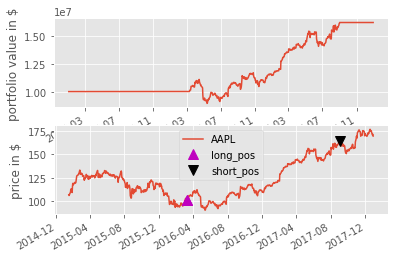

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_pos,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.000535,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2015-01-05 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.018585,0.196720,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2015-01-06 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.027829,0.139106,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2015-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.015715,0.206973,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2015-01-08 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.001752,0.236042,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2015-01-09 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.006276,0.218112,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2015-01-12 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.014060,0.203322,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2015-01-13 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.016834,0.188302,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2015-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.022769,0.177394,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2015-01-15 21:00:00+00:00,106.820,0.000000,0.000000,0.000000,-0.031722,0.170558,0.000000,0.0,1.000000e+07,0.0,...,106.820,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [127]:
%%zipline --start 2015-1-1 --end 2018-1-1 -o ../data/strategy1.pickle

## strategy: use a pre-trained model to get probability (or confidence) 
## of your prediction,
## then use this probability to adjust your bet sizing
## %%zipline --start 2010-1-1 --end 2016-1-1

from zipline.api import (
    order_target, 
    order_target_percent,
    record, 
    symbol,
    date_rules,
    time_rules,
    schedule_function
)

import matplotlib.pyplot as plt
import numpy as np
import pickle

def initializeCDF(history, num_bins=20):
    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(history, bins=num_bins, normed=True) 
    # Now find the cdf
    cdf = np.cumsum(counts) 
    bin_edges=bin_edges[1:]
    return bin_edges, cdf

def getCDF(price, bin_edges, cdf):
    cdfs = [cdf[i] for i, b in enumerate(bin_edges) if price < b ]
    return 1 if len(cdfs) == 0 else cdfs[0] 
    
    
def initialize(context):
    context.i = 0
    context.warmup_i = 10 
    context.asset = symbol('AAPL')
    context.model_file = '../model/LR.sav'
    context.model = None
    
    context.history_file = '../data/history.pickle' 
    context.history = None
    context.mode = 'test'
    
    with open(context.model_file, 'rb') as f:
        context.model = pickle.load(f)  
        
    
    schedule_function(rebalance, date_rules.every_day(), time_rules.market_open())
      
            
def rebalance(context, data):   
    context.i += 1
    if context.i < context.warmup_i:
        return
    if context.mode == 'test':
        price = data.current(context.asset, 'price')  
        window = data.history(context.asset, 'price', bar_count=7, frequency="1d")
        
        prob = context.model.predict_proba([window])[0] 
        # get predicted label: 
        # -1 for price decrease, 0 for no action, 1 for price increase
        Ypredict = np.argmax(prob) -1
        
        # get p[x=1]: the probability that price will go up
        p_x = prob[-1] 
        
        z = (p_x - 1.0/3) / np.sqrt(p_x * (1 - p_x))
        m = 2 * z - 1
        #print(Ypredict)
        if Ypredict < 0: 
            order_target_percent(context.asset, 0)
            
        if Ypredict > 0: 
            #print('positive')
            order_target_percent(context.asset, 1) 
         
        # Save values for later inspection
        record( AAPL=data.current(context.asset, 'price'),
               short_pos=price,
               long_pos=price)
        

def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

     
    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    #perf[['short_pos', 'long_pos']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[
        [t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    
    print(buys.index)
    print(sells.index)
    ax2.plot(buys.index, perf.long_pos.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_pos.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0) 
    plt.show() 

 
    

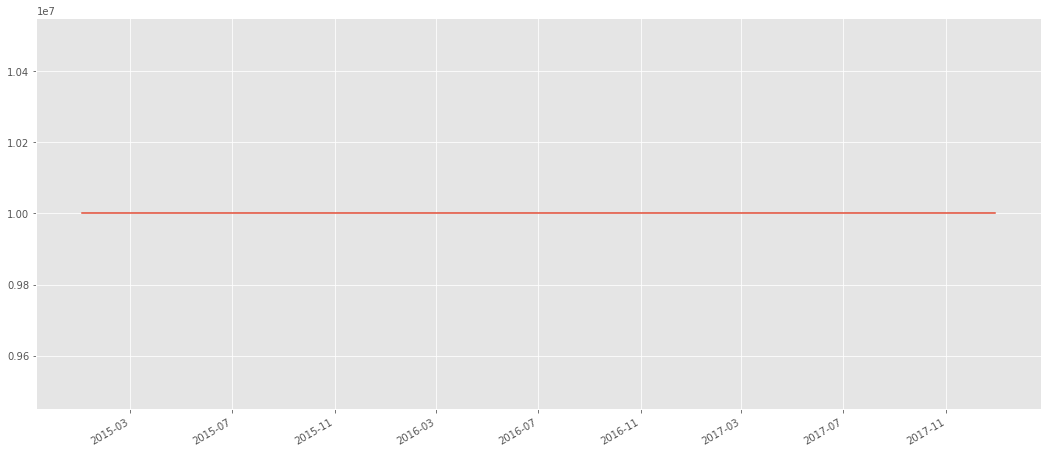

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
backtest_df = pd.read_pickle("../data/strategy1.pickle")
backtest_df.portfolio_value.plot()
plt.gcf().set_size_inches(18, 8)
plt.show()